# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [192]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [193]:
#import data into DF
wholesaleDF = pd.read_csv('Wholesale_Data.csv')
wholesaleDF.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [194]:
wholesaleDF.shape

(440, 8)

In [195]:
#check for null values
wholesaleDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [196]:
wholesaleDF.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [197]:
#statistics for each variable/column
wholesaleDF.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


It appears that 'Channel' and 'Region' are categorical variables
- 'Channel ranges from 1-2
- 'Region' ranges from 1-3

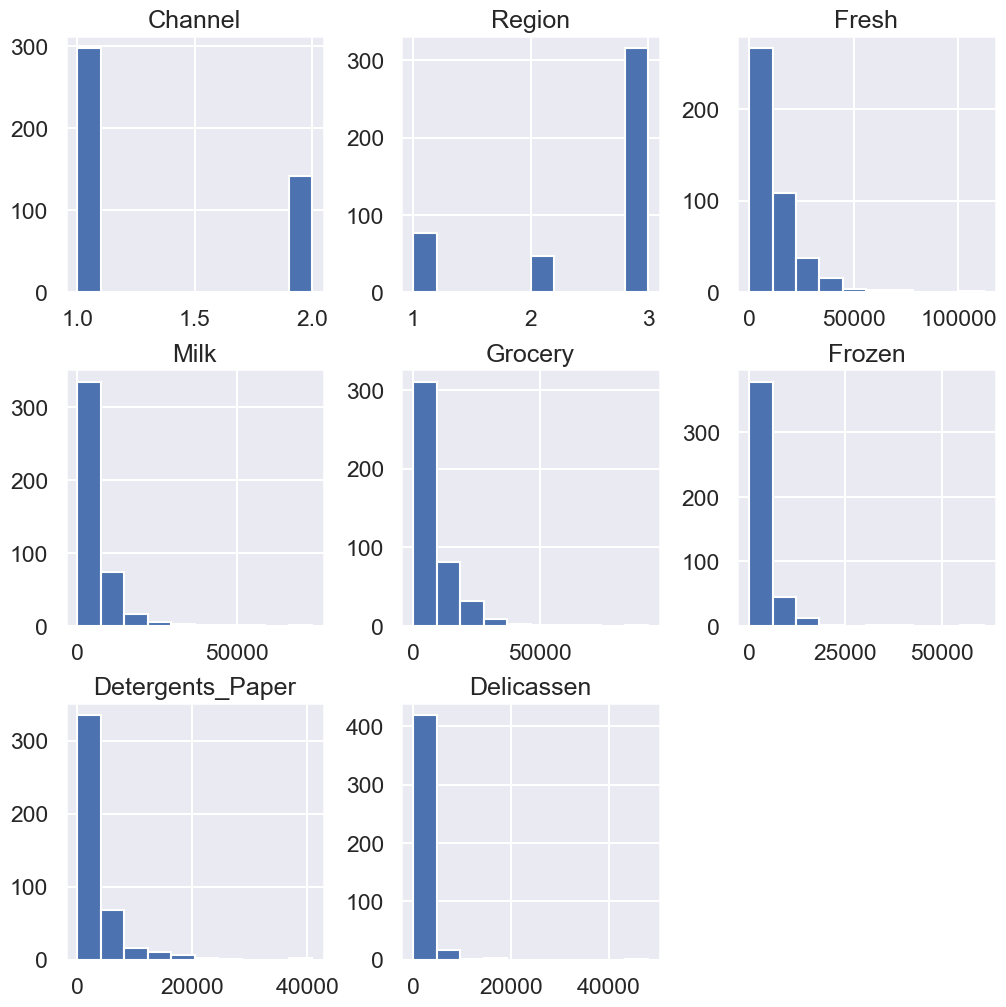

In [198]:
#distribution plots
sns.set_theme(style = 'darkgrid', context = 'talk')

distplot = wholesaleDF.hist(figsize=(12,12))

All the numeric variables are right-ward skewed

In [199]:
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

In [200]:
#Checks for the number of outliers in each column

#IQR and bounds calculated are for every column in the DF
q1 = wholesaleDF.quantile(0.25)
q3 = wholesaleDF.quantile(0.75)
IQR = q3 - q1

upperbound = q3 + 1.5*IQR
lowerbound = q1 - 1.5*IQR

#calculate the number of outliers in each column
for index, column in enumerate(wholesaleDF):
    outliers = wholesaleDF[(wholesaleDF[column] > upperbound[index]) | (wholesaleDF[column] < lowerbound[index])]
    print(f'# of outliers in {column}: {len(outliers[column])}')

# of outliers in Channel: 0
# of outliers in Region: 0
# of outliers in Fresh: 20
# of outliers in Milk: 28
# of outliers in Grocery: 24
# of outliers in Frozen: 43
# of outliers in Detergents_Paper: 30
# of outliers in Delicassen: 27


C:\Users\l3onw\AppData\Local\Temp\ipykernel_19260\1891633931.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outliers = wholesaleDF[(wholesaleDF[column] > upperbound[index]) | (wholesaleDF[column] < lowerbound[index])]


- Many outliers for each numeric column
    - However, this is to be expected with skewed data (rightward)
- These values will not be removed 
    - May apply a log transformation depending on future output of models

Text(0.5, 1.0, 'Fresh vs Milk')

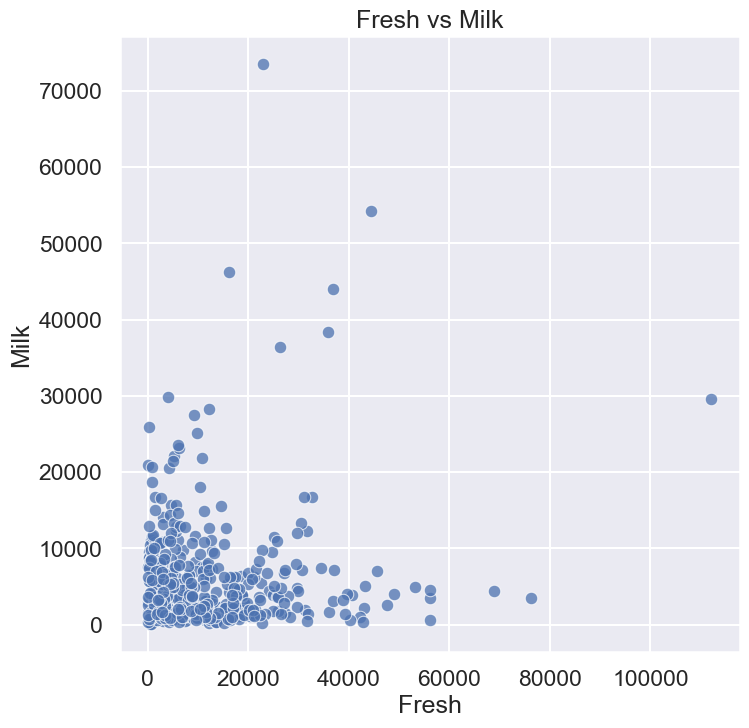

In [201]:
# scatter plot of Milk vs Fresh
plt.figure(figsize= (8,8))
sns.scatterplot( x= wholesaleDF['Fresh'],y= wholesaleDF['Milk'], alpha = 0.75)

plt.title('Fresh vs Milk')

- There appears to be a positive correlation between Milk and Fresh
    - however, it does to be incredibly minor (should check with correlation matrix)

<Axes: >

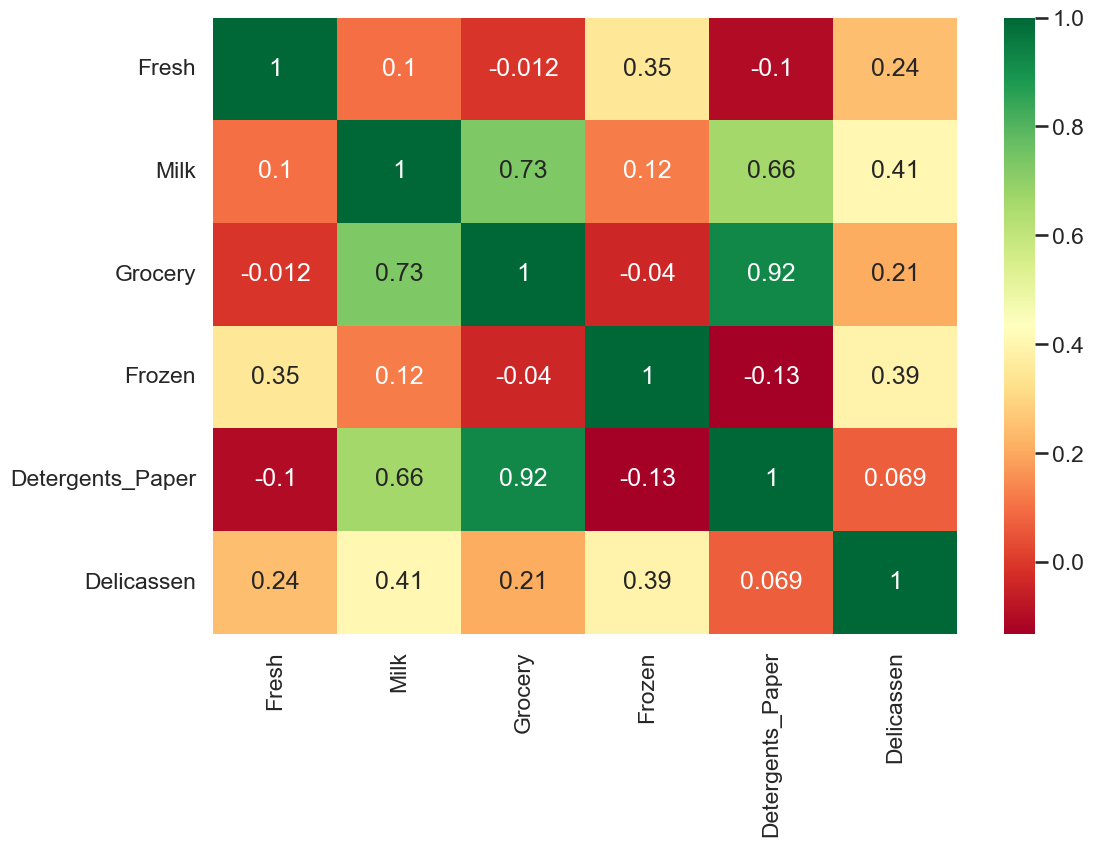

In [202]:
#datframe with only the numeric columns (Region and Channel are categorical)
NumCol_wholesaleDF = wholesaleDF[wholesaleDF.columns[2:]]

#create correlation matirx and corresponding heatmap
corrMatrix = NumCol_wholesaleDF.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corrMatrix,  annot=True, cmap='RdYlGn')


Stongest Correlations include:
- Milk and Grocery (0.73)
- Milk and Detergrent paper (0.66)
- Grocery and Detergent Paper (0.92)
 

<Axes: >

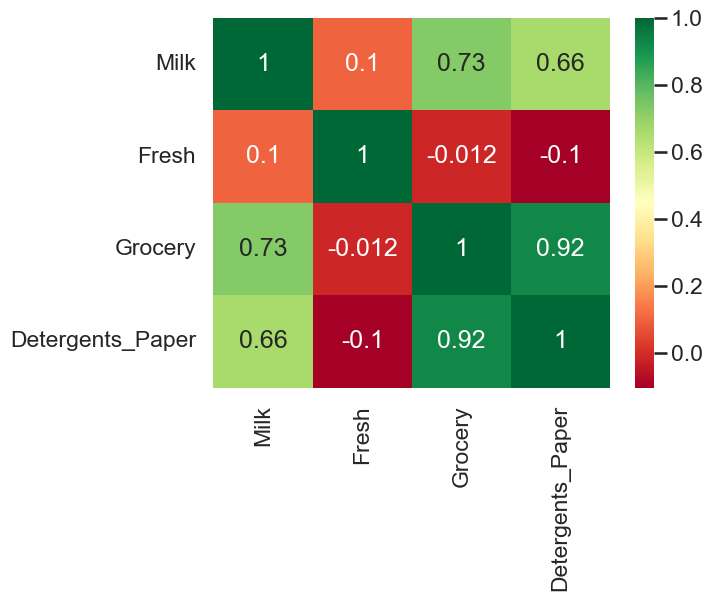

In [203]:
#correlation matrix of just milk, fresh, grocery and detergent paper
#(info which is nested within previous heatmap)
mini_corr_matrix = NumCol_wholesaleDF[['Milk','Fresh','Grocery','Detergents_Paper']].corr()

sns.heatmap(mini_corr_matrix, annot=True, cmap='RdYlGn')


From the smaller correlation matrix, it is easier to see that Milk, Grocery and Detergent Paper are heavily,positively correlated

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [204]:
#imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [205]:
#assigning all the numeric columns as x
x = NumCol_wholesaleDF
x

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [206]:
#standarizing/scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

### Identifying optimal number of clusters (Elbow Method)

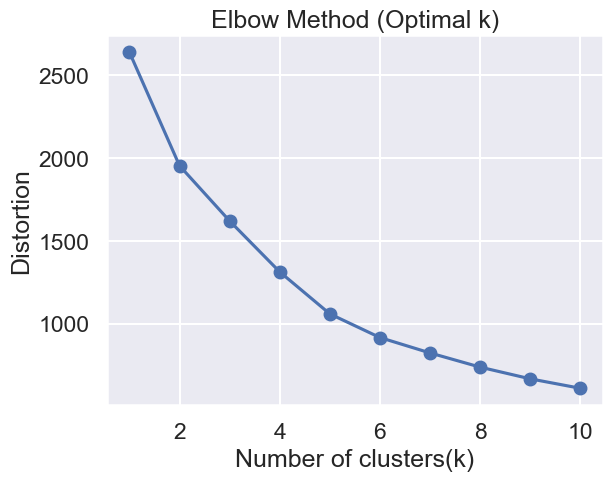

In [207]:
distortions = []

# set max number of potential clusters to 10
for k in range(1, 11): 
    km = KMeans(n_clusters= k, n_init=10, random_state=0)
    km.fit(x_scaled)
    distortions.append(km.inertia_)
        
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Distortion')
plt.title('Elbow Method (Optimal k)')
plt.show() 

- The graph is relatively smooth, however there is a noticable kink at k= 5
    - k=5 is the optimal k, which will be used moving forward
- An argument may be made for k=2
    - However for the sake of customer segmentation, more clusters may provide greater insight

In [208]:
#initialize kmeans clustering
k = 5
kmeans = KMeans(n_clusters= k, random_state=0, n_init= 10)
kmeans.fit(x_scaled)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [209]:
#Checking the clusters for each value
kmeans.fit_predict(x_scaled)

array([0, 4, 4, 0, 3, 0, 0, 0, 0, 4, 4, 0, 3, 4, 4, 0, 4, 0, 0, 0, 0, 0,
       3, 4, 4, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 4, 3, 4, 4, 3, 3, 0, 4, 4,
       4, 4, 4, 1, 4, 4, 0, 0, 3, 4, 0, 0, 1, 4, 0, 0, 0, 1, 0, 4, 0, 1,
       0, 4, 0, 0, 3, 3, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 1, 1, 3,
       0, 3, 0, 0, 1, 3, 4, 0, 0, 0, 0, 0, 4, 4, 0, 3, 0, 0, 4, 4, 0, 4,
       0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 4, 4, 0, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       3, 0, 0, 0, 0, 3, 4, 2, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 3, 3, 4,
       0, 0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 1, 0, 0, 4, 4, 4, 0, 4, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 0, 3, 4, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       4, 4, 4, 0, 4, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,

In [210]:
# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add cluster labers to DFs
wholesaleDF['ClusterKM'] = cluster_labels

# Visualize the clusters using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)


In [211]:
#number of results per cluster
wholesaleDF['ClusterKM'].value_counts()

ClusterKM
0    270
4     96
3     63
1     10
2      1
Name: count, dtype: int64

Cluster 2 contain only one value (outlier)

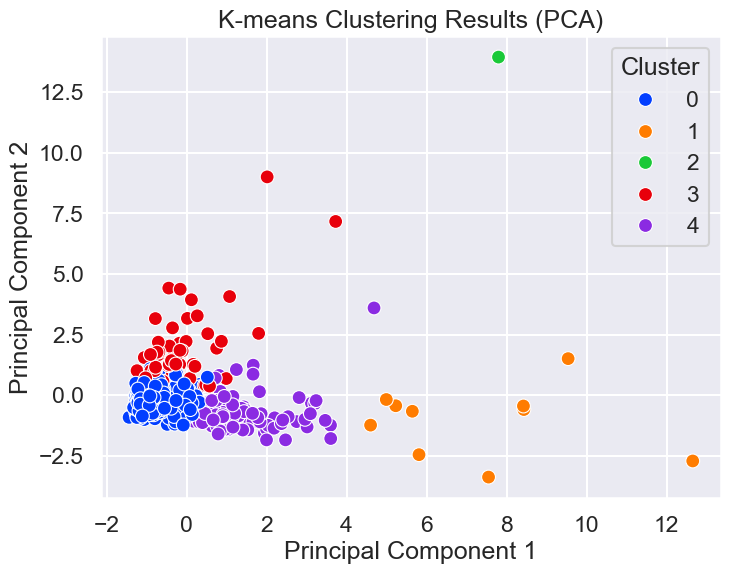

In [212]:
# Create a scatter plot of the clusters in the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=cluster_labels, palette='bright', s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results (PCA)')
plt.legend(title='Cluster')
plt.show()

- Reducing k would group the potential outlier within another cluster, resulting in potentially misleading results
- Best to leave it alone

In [213]:
#Means of each cluster, organized by features
wholesaleDF.groupby('ClusterKM').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
ClusterKM,,,,,,,,
0,1.137037,2.518519,9092.155556,2967.759259,3807.411111,2271.759259,989.814815,978.962963
1,2.000000,2.500000,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
2,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
3,1.126984,2.682540,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254
4,1.906250,2.520833,5754.166667,10866.604167,16607.104167,1464.125000,7202.875000,1813.385417


### Interpretation
 - Cluster 0: Fresh items are by far the most popular
   - Values are much smaller compared to other clusters
 - Cluster 1: Grocery and Milk are the most popular
 - Cluster 2: Delicassen is the most popular
    - By far the highest mean value for this feature compared to other clusters
    - This attribute is likely why the observation has its own cluster 
 - Cluster 3: Fresh is the most popular category
 - Cluster 4: Grocery and Milk are the most popular
    - However, values are drastically smaller than those in Cluster 1


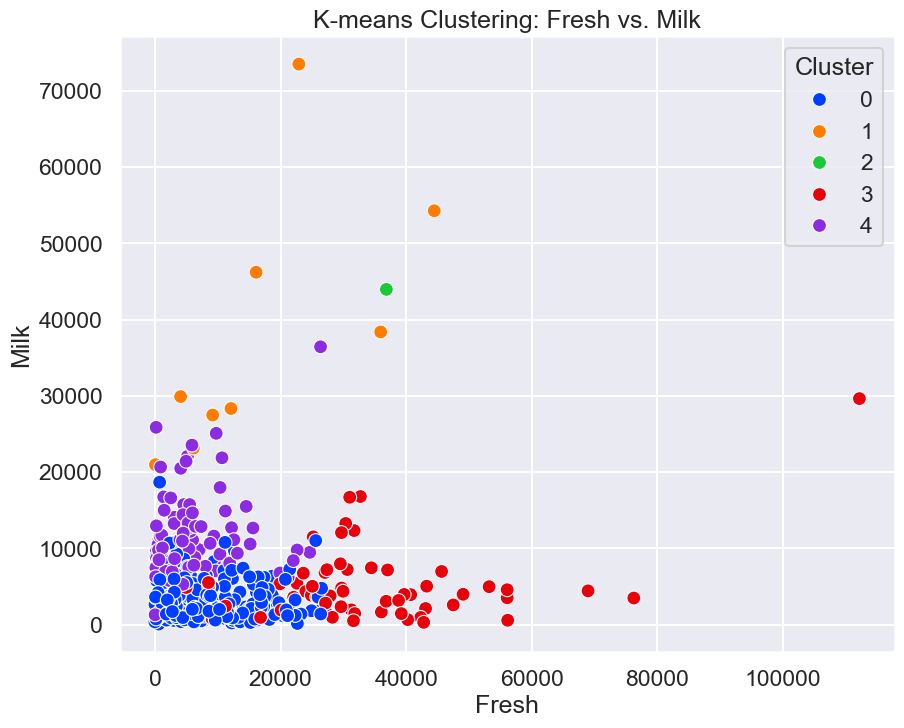

In [214]:
#Visualization of previous scatter plot of 'Fresh' vs 'Milk' but with clusters included
plt.figure(figsize=(10, 8))
sns.scatterplot(data=wholesaleDF, x='Fresh', y='Milk', hue='ClusterKM', palette='bright', s=100)

plt.title('K-means Clustering: Fresh vs. Milk')
plt.legend(title='Cluster')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [215]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [216]:
#Utilize scaled data from previous section
print(x_scaled)

[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


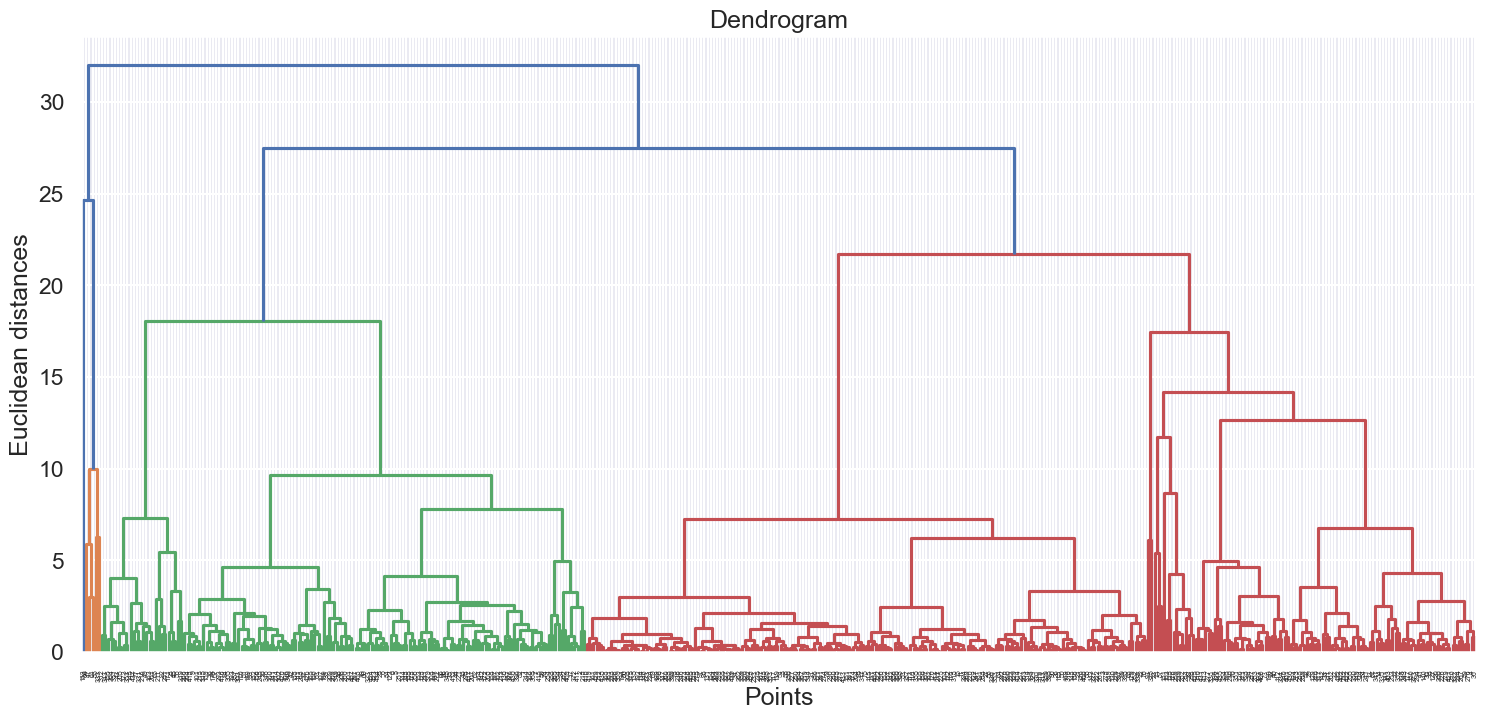

In [217]:
# Hierachical clustering

#analzye dendrogram to identify optimal clusters
plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method='ward'))
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.xlabel('Points')
plt.show()

- Through visual inspection, the optimal number of clusters is 2
    - the longest horizontal line which may be drawn across the diagram without hitting a horizontal line folllows directly after the first branch
- The algorithm somewhat aligns with the results of the Elbow Method
    - Different algorithms/models may provide different results
        - Up to the descrepancy of the interpreter to choose the approciate hyperparameters
    

In [218]:
#Perform hierarchical clustering
clusters = 2

ac = AgglomerativeClustering(linkage='ward', n_clusters = clusters)
ac.fit(x_scaled)

AgglomerativeClustering()

In [223]:
wholesaleDF['ClusterHC'] = ac.labels_
wholesaleDF['ClusterHC'].value_counts()

ClusterHC
0    434
1      6
Name: count, dtype: int64

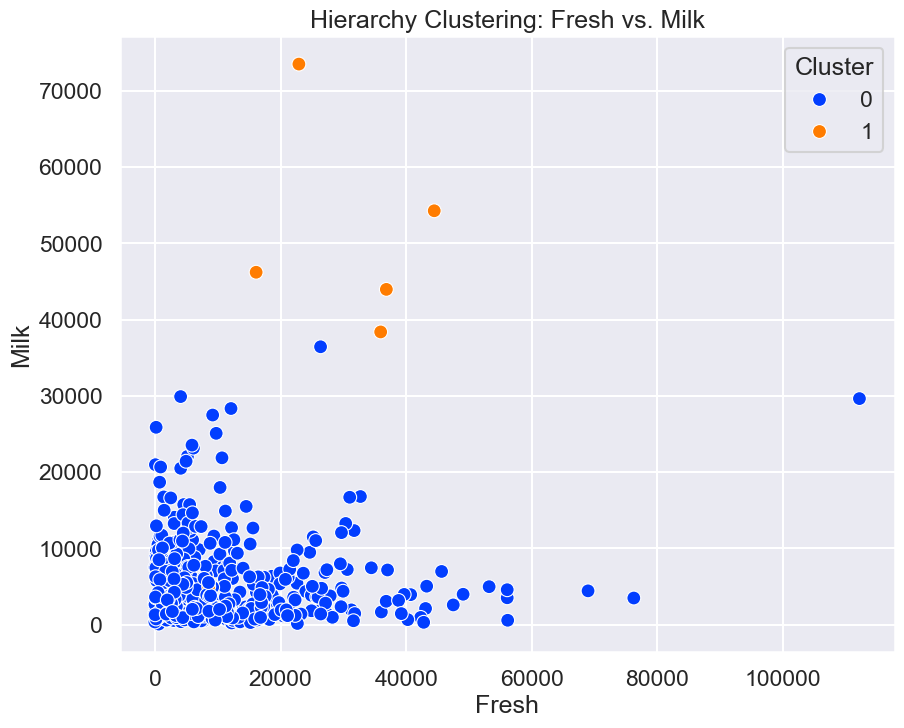

In [232]:
#Visualization of 'Fresh' vs 'Milk' but with hierarchy clusters included
plt.figure(figsize=(10, 8))
sns.scatterplot(data=wholesaleDF, x='Fresh', y='Milk', hue='ClusterHC', palette='bright', s=100)

plt.title('Hierarchy Clustering: Fresh vs. Milk')
plt.legend(title='Cluster')
plt.show()

In [235]:
#Statistical interpretation of each cluster, based on mean values
wholesaleDF.groupby('ClusterHC').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ClusterKM
ClusterHC,,,,,,,,,
0,1.315668,2.539171,11786.334101,5274.433180,7306.523041,2999.852535,2575.453917,1404.276498,1.331797
1,1.833333,2.833333,27477.000000,43542.166667,54588.500000,8285.666667,25018.333333,10247.833333,1.166667


Interpretation
- It appears the algorithm had split the clusters up based on total spending
    - Cluster 0 : Low spending overall
    - Cluster 1 : High spending overall

- These results are not as helpful as those generated using K-means clustering
- The limited number of results provide limited insight granted the small dataset size

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [237]:
#relevent datasets and data from previous sections
NumCol_wholesaleDF
x_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [239]:
#Perform PCA
pca =PCA()
pca.fit(x_scaled)

PCA()

In [240]:
#Explained Variance Ratio
EVR = pca.explained_variance_ratio_

#Cumulative Variance Ratio
CVR = EVR.cumsum()

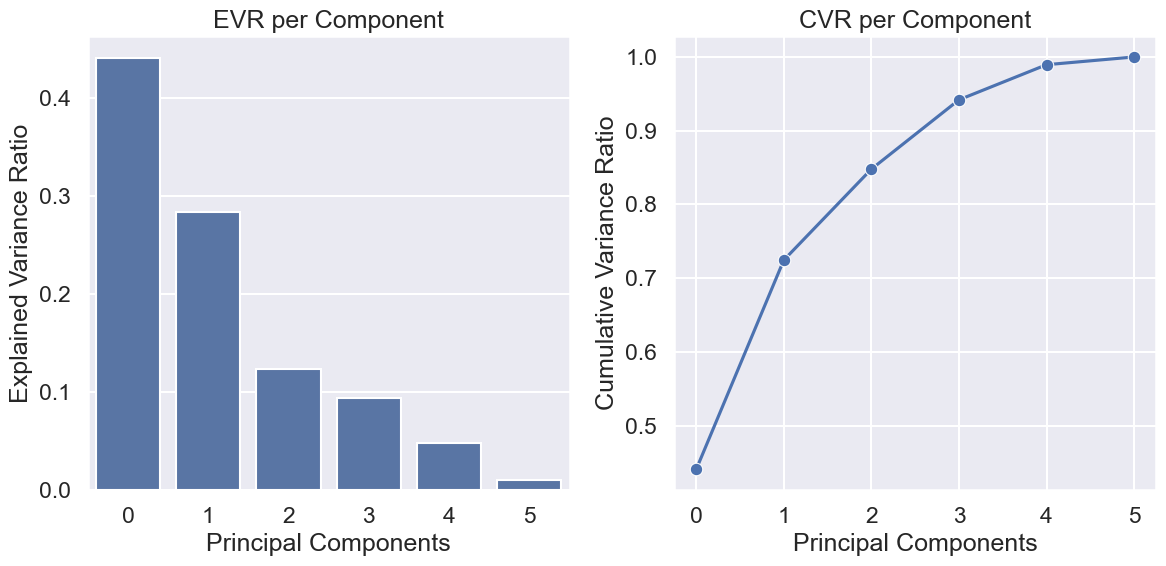

In [266]:
#plot for both explained and cumulative variance ratios
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Explained Variance Ratio
sns.barplot(EVR, ax=axes[0])
axes[0].set_title('EVR per Component')
axes[0].set_xlabel('Principal Components')
axes[0].set_ylabel('Explained Variance Ratio')

#Cumulative Variance Ratio
sns.lineplot(CVR, ax=axes[1], marker='o')
axes[1].set_title('CVR per Component')
axes[1].set_xlabel('Principal Components')
axes[1].set_ylabel('Cumulative Variance Ratio')

#clean layout
plt.tight_layout()

- Through visual inspection, the number of principal components should be 5
    - The addition of a 6th PC would not aid the model nearly as much

In [269]:
#determine number of components which would explain 95% of total variance within the dataset
nComponents = (CVR <= 0.95).sum() + 1
print("Number of PCs :", nComponents)

Number of PCs : 5


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

EDA
- No missing/null values within the dataset
- Two categorical columns (Channel, Region)
- Rightward skewed distribution of data for the numeric columns
- Potential outliers, however important to keep within the dataset when identifying customer segments

Optimal clusters
- The Elbow Method and Dendrogram approaches both generated different k's
- Different algorithms/methods will result in different optimal values due to their methods of computing their numbers
- Elbow Method seperated customer segments by product/order categories (i.e. purchasing habits)
    - k = 5
- The Dendrogram seperated customers based on their overall spending
    - k = 2
- K-means and Hierarchy clustering resulted in a different number of clusters
    - Both algorithms generated meaningful results

Principal Component Analysis
- PCA was conducted to understand the underlying structure of the data
    - Also to find the optimal number of features/reduce dimension
- Five principal components would sufficiently explain 95% of the variations within the dataset
- This information may be useful when conducting further analysis 